# Parts of Speech Tagging

## 1 Data Exploration

### 1.1 Manual Tagging

The following sentence has been manually tagged:

One/NUM of/ADP the/DET most/ADJ basic/ADJ and/CCONJ most/ADJ useful/ADJ task/NOUN when/ADV processing/VERB text/NOUN is/AUX to/ADP tokenize/VERB each/DET word/NOUN separately/ADV and/CCONJ label/VERB each/DET word/NOUN according/VERB to/ADP its/PRON most/ADJ likely/ADJ part/NOUN of/ADP speech/NOUN ./PUNCT

In/ADP the/DET mid/NOUN 1980/NUM s/PRT ,/PUNCT researchers/NOUN in/ADP Europe/PROPNOUN began/VERB to/ADP use/VERB hidden/ADJ Markov/PORPNOUN models/NOUN (/PUNCT HMM/PROPNOUN s/PRT )/PUNCT to/PRT disambiguate/VERB parts/NOUN of/ADP speech/NOUN ,/PUNCT when/ADV working/VERB to/ADP tag/VERB the/DET Lancaster/PROPNOUN -/PUNCT Oslo/PROPNOUN -\PUNCT Bergen/PROPNOUN Corpus/NOUN of/ADP British/PROPNOUN English/PROPNOUN ./PUNCT

A/DET first/ADJ approximation/NOUN was/AUX done/VERB with/ADP a/DET program/NOUN by/ADP Greene/PROPNOUN and/CCONJ Rubin/PROPNOUN ,/PUNCT which/DET consisted/VERB of/ADP a/DET huge/ADJ handmade/ADJ list/NOUN of/ADP what/PRON categories/NOUN could/VERB co-occur/VERB at/ADP all/DET ./PUNCT

Some of the manual tagging is prevented by tokenization decisions (how words are split). Give examples.
Some taggers might tag the word co-accur as NOUN and other might seperate it into 3 parts, NOUN SYM NOUN.

### 1.2 Gathering and Cleaning Up Data

Choose a query to execute using the google package and gather about 10 hits from this site. Save the resulting hits into clean text files. 

In [1]:
import os
import codecs
import google3

#Converts url to text
Text = google3.google("Real")

#make the raws and tokens
google3.AnalyzeResults(Text)
os.rename("Data", "clean")

Run the best POS Tagger you have available from class on the resulting text files, 

In [4]:
import nltk
from nltk.corpus import brown
from nltk import UnigramTagger
from nltk import DefaultTagger
from nltk import AffixTagger
from nltk import NgramTagger
from nltk import RegexpTagger

In [5]:
# Prepare training
brown_news_tagged = brown.tagged_sents(categories='news', tagset='universal')
train = brown_news_tagged[100:]
test = brown_news_tagged[:100]

regexp_tagger = RegexpTagger(
     [(r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),   # cardinal numbers
      (r'(The|the|A|a|An|an)$', 'DET'),   # articles
      (r'.*able$', 'ADJ'),                # adjectives
      (r'.*ness$', 'NOUN'),               # nouns formed from adjectives
      (r'.*ly$', 'ADV'),                  # adverbs
      (r'.*s$', 'NOUN'),                  # plural nouns
      (r'.*ing$', 'VERB'),                # gerunds
      (r'.*ed$', 'VERB'),                 # past tense verbs
      (r'.*', 'NOUN')                     # nouns (default)
])
#Affix tagger
at2 = AffixTagger(train, backoff=regexp_tagger)
#Unigram tagger
ut3 = UnigramTagger(train, backoff=at2)
ut3.evaluate(test)
# Ngram tagger
ct3 = NgramTagger(3, train, backoff=ut3)

google3.EnsureDir("tagged/")
for i in range (0, 12):
  try:
  	tokenFile = codecs.open(os.path.join("clean", "Tokens-%s.txt" % (i)), "r", encoding="utf-8")
  	taggedFile = codecs.open(os.path.join("tagged", "Tagged-%s.txt" % (i)), "a", encoding="utf-8")
  	tokenList = tokenFile.read().splitlines()
  	# taggedTokens = nltk.pos_tag(tokenList, tagset='universal')
  	taggedTokens = ct3.tag(tokenList)
  	# print(taggedTokens)
  	for pair in taggedTokens:
  		(word, tag) = pair
  		taggedFile.write(word.rstrip() + "\\" + tag + "\n")
  	tokenFile.close()
  	taggedFile.close()
  except:
  	next

Let's evaluate the tags to check that it gives us the best accuracy as seen in class:

In [6]:
print(ct3.evaluate(test))

0.9585537918871252


Review the tagging of the new text separately and compare your tagging results. Report the list of words on which your 2 manual tagging decisions are different. Show the differences between each of your tags and the tags produced by the automatic tagger.

In [7]:
import sys, os, difflib, codecs
from difflib import Differ

# init differ
d = Differ()
# open checked files
check1 = codecs.open(os.path.join("checked1", "Tagged-3-check1.txt"), "r", encoding="utf-8")
check2 = codecs.open(os.path.join("checked2", "Tagged-3-check2.txt"), "r", encoding="utf-8")
# read files
text1 = check1.read().splitlines()
text2 = check2.read().splitlines()
# close files
check1.close()
check2.close()
# get differences
result = list(d.compare(text1, text2))
# save results
resultFile = codecs.open("differences.txt", "w", encoding="utf-8")
for r in result:
	resultFile.write(r + "\n")
resultFile.close()

We used difflib to give us a list of differences between checked1 and checked2, we saved the list in differences.txt. We then manually checked the differences and chose the best tag for each disagreement, and saved it in the "final" folder.

Errors we encountered:
1. Errors met while dealing with the Google engine:
No errors.
2. Errors met while downloading the material from the Google hits
Some of the urls were not html compatible.
3. Errors met while cleaning up the HTML pages
Some sentences did not make it to the clean text files.
4. Errors met while segmenting the text into sentences and words
No errors.
5. Errors met by the automatic tagger: how many errors were reported by checked1 and checked2 each, and altogether.
Checked1: 42 reported errors. Checked2: 57 reported errors.
6. Disagreements between checked1 and checked2.
Disagreements between NOUN, VERB tags and ADJ, NOUN.
7. Actual accuracy obtained by your automatic tagger compared with the final verified version of the text collection.
The small size of the final twenty tagged sentences will not impact the the huge size of the corpus ,
So the accuracy will not be change.


### 1.2 Gathering Basic Statistics

Write a function that plots the number of words having a given number of tags.

In [8]:
from nltk import FreqDist
from nltk import ConditionalFreqDist
import pylab
import matplotlib
%matplotlib inline

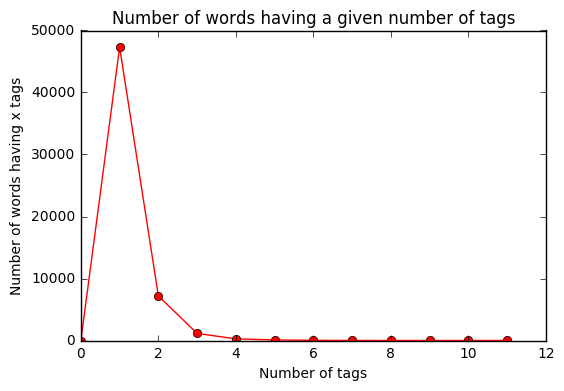

In [9]:
def PlotNumberOfTags(corpus):
    #list of words and their frequency in the brown corpus
    words_by_freq = list(nltk.FreqDist(brown.words()))
    #list of words and the frequency of their tags
    cfd = nltk.ConditionalFreqDist(corpus)
    #list of how many tags each word has
    numOfTagsPerWord = [len(cfd.get(i)) for i in cfd]
    #max num of tags out of the prev list
    maxNumOfTags = max(numOfTagsPerWord)
    ys = []
    #for each amount of tags (n) -> count how many words have n tags
    for n in range(0, maxNumOfTags):
        #append to the y axis list
        ys.append(numOfTagsPerWord.count(n))

    pylab.plot(range(0, maxNumOfTags), ys, '-ro')
    pylab.title('Number of words having a given number of tags')
    pylab.xlabel('Number of tags')
    pylab.ylabel('Number of words having x tags')
    pylab.show()

PlotNumberOfTags(brown.tagged_words())

## 2 Stratified Test/Train Sets

We want to split the dataset into a train and test dataset - as a 90%/10% split. 

In [10]:
import math

function to split the brown dataset in a stratified manner

In [11]:
def stratified_split(corpus, ratio):
	train = []
	test = []
    #split each category into train and test in the same proportion.
	for c in corpus.categories():
		brown_sents = brown.tagged_sents(categories=c, tagset='universal')
		corpusSize = len(brown_sents)
		cut_off = int(math.floor(ratio*corpusSize))
		train = train + brown_sents[:cut_off]
		test = test + brown_sents[cut_off:]
	return train, test

In [12]:
stratified_split_train, stratified_split_test = stratified_split(brown, .9)


## 3. Unigram

### 3.1 Unigram Tagger

3.1.1 Write a class SimpleUnigramTagger which directly inherits from nltk.TaggerI and implements a unigram tagger in the simplest possible manner. 


In [13]:
class SimpleUnigramTagger(nltk.TaggerI):

    def __init__(self, train):
        self.train = train
        # flatten train list
        corpus = [item for sublist in self.train for item in sublist]
        #list of words and the frequency of their tags
        cfd = nltk.ConditionalFreqDist(corpus)
        #list of All the words in the corpus
        wordsList = [w for w in cfd.keys()]
        # iterate over the wordList and choose for every word the maximum tag frequency in the cfd
        self.taggedWords = [(w, (cfd.get(w)).max()) for w in wordsList]
    # input: token --> output: the appropiate tag for token from the taggedWords 
    def getTag(self, token):
        for t, tag in self.taggedWords:
            if t == token:
            	return tag
        return 'None'
    
    def tag(self, tokens):
        return [(t, self.getTag(t)) for t in tokens]
    
    def tag_sents(self, sentences):
        return [self.tag(s) for s in sentences]

 3.1.2. Verify that your tagger produces the same evaluation as the one provided in nltk. 

Unigram Tagger Accuracy:

In [14]:
unigramTagger = nltk.UnigramTagger(train)
print("Accuracy: %f%%\n" % (unigramTagger.evaluate(test)*100.0))

Accuracy: 88.932981%



SimpleUnigramTagger Accurace:

In [15]:
simpleUnigramTagger = SimpleUnigramTagger(train)
accuracy = simpleUnigramTagger.evaluate(test)
print("Accuracy: %f%%" % (100*accuracy))


Accuracy: 88.932981%


 3.1.3. In your evaluation, count how many of the errors are due:

1.To the selection of a wrong tag for a known word (one that was observed at training time) :

In [16]:
# calculate errors in tag assignment
allWordsCount = 0
# The test is a list is of lists of (token, tag ) = list of sentences
for t in test:
    # Add to the allWordCount number of word in sentence t
    allWordsCount = allWordsCount + len(t)
#This formula give us how much incorrectly tagged words
tagErrors = allWordsCount - (allWordsCount*accuracy)

In [17]:
print("Words tagged incorrectly: %d" % tagErrors)



Words tagged incorrectly: 251


2.To the fact that the tested word was unknown (was never seen at training time) 

In [18]:
def noneCount(simpleTaggedSents):
    # calculate number of unknown words
    noneCount = 0
    # flatten test list
    flattenedSents = [item for sublist in simpleTaggedSents for item in sublist]
    noneCount = sum(1 for (word,tag) in flattenedSents if tag == "None")
    return noneCount

print("Unknown words: %d" % noneCount(simpleUnigramTagger.tag_sents(nltk.untag(sent) for sent in test)))

Unknown words: 177


3.1.4. Report the rate of unknown words per category. 

In [19]:
print("Unknown words (by category):")
for c in brown.categories():
    brown_sents = brown.tagged_sents(categories=c, tagset='universal')
    train_ = brown_sents[100:]
    test_ = brown_sents[:100]
    simpTag = SimpleUnigramTagger(train_)
    simpleTaggedSents = simpTag.tag_sents(nltk.untag(sent) for sent in test_)
    print("%s: %d" % (c, noneCount(simpleTaggedSents)))

Unknown words (by category):
adventure: 68
belles_lettres: 130
editorial: 234
fiction: 132
government: 77
hobbies: 309
humor: 409
learned: 229
lore: 319
mystery: 116
news: 177
religion: 319
reviews: 331
romance: 173
science_fiction: 180


### 3.2 Using Entropy to Filter Affix Tagger

3.2.1. Write a specific train method for the AffixTagger which filters the learned model according to this idea.

In [20]:
from nltk import SequentialBackoffTagger
from math import log

In [21]:
def new_train(self, tagged_corpus, cutoff, verbose=False):
    
    #entropy formula
    def entropy(fd,context):
        e = 0
        for (tag,count) in fd.get(context).items():
            p = fd[context].freq(tag)
            if p != 0:
                e += p*log(p)
        return -e

    token_count = hit_count = 0
    #A context is considered 'useful' if it's not already tagged perfectly by the backoff tagger.
    useful_contexts = set()
    #Count how many times each tag occurs in each context.
    fd = nltk.ConditionalFreqDist()
    fdist = nltk.FreqDist()
    for sentence in tagged_corpus:
        tokens, tags = zip(*sentence)
        for index, (token, tag) in enumerate(sentence):
            # Record the event.
            token_count += 1
            context = self.context(tokens, index, tags[:index])
            if context is None:
                continue
            fd[context][tag] += 1
            fdist[tag] += 1
            #If the backoff got it wrong, this context is useful:
            if (self.backoff is None or tag != self.backoff.tag_one(tokens, index, tags[:index])):
                useful_contexts.add(context)
    # Build the context_to_tag table -- for each context, figure
    # out what the most likely tag is.  Only include contexts that
    # we've seen at least `cutoff` times.
    for context in useful_contexts:
        H = entropy(fd,context)
        best_tag = fd[context].max()
        hits = fd[context][best_tag]
        if (hits > cutoff) and (H < cutoff):
            self._context_to_tag[context] = best_tag
            hit_count += hits
     # Display some stats, if requested.
    if verbose:
        size = len(self._context_to_tag)
        backoff = 100 - (hit_count * 100.0)/ token_count
        pruning = 100 - (size * 100.0) / len(fd.conditions())
        print("[Trained Unigram tagger:", end)
        print("size=%d, backoff=%.2f%%, pruning=%.2f%%]" % (size, backoff, pruning))

This is the same train function as the original, the only difference is the entropy added in lines 35 and 38.
Entropy measures the level of uncertainty in a distribution, therefore we want to keep suffixes for which we have seen sufficiently many observations to obtain a reliable estimation of the tags distribution.

Now we will set the train method as the new one:

In [22]:
nltk.AffixTagger._train = new_train

3.2.2. We need then to select a good value for this prefix. One way to do this is to optimize the cutoff parameter. We do this by splitting the training dataset in two parts (90%/10% of the training data) - which we call train and development. We train the AffixTagger with various values of the cutoff over a range of values on the train set, and compare the accuracy obtained by each model over the development set. The optimized value of the parameter is the one that gives the best accuracy. Write a method optimize_parameter() to perform this task.

In [23]:
def optimize_parameter():
    #list of possible cutoffs
    params = [x/5 for x in range(1,15)]
    max_accuracy = 0
    max_param = 0
    for param in params:
        #train the tagger with a potential cutoff
        ATagger = AffixTagger(stratified_split_train, backoff=regexp_tagger, cutoff = param)
        #test accuracy
        acc = (100.0 * ATagger.evaluate(stratified_split_test))
        #get max accuracy
        if acc > max_accuracy:
            max_accuracy = acc
            max_param = param
        print (params.index(param)+1, param, ("Accuracy: %4.1f%%" % max_accuracy))
    return max_param

1.Does entropy filtering improve the accuracy of the AffixTagger?

In [24]:
afxt1 = AffixTagger(stratified_split_train, backoff=regexp_tagger)
acc_test = 100.0 * afxt1.evaluate(stratified_split_test)
print ("Before optimization: AffixTagger Accuracy: %4.1f%%" % acc_test)

Before optimization: AffixTagger Accuracy: 38.6%


In [25]:
afxt2 = AffixTagger(stratified_split_train, cutoff=optimize_parameter(), backoff=regexp_tagger)
acc_test = 100.0 * afxt2.evaluate(stratified_split_test)
print ("After optimization: AffixTagger Accuracy: %4.1f%%" % acc_test)

1 0.2 Accuracy: 40.7%
2 0.4 Accuracy: 41.5%
3 0.6 Accuracy: 42.0%
4 0.8 Accuracy: 42.6%
5 1.0 Accuracy: 43.4%
6 1.2 Accuracy: 43.9%
7 1.4 Accuracy: 44.0%
8 1.6 Accuracy: 44.1%
9 1.8 Accuracy: 44.2%
10 2.0 Accuracy: 44.2%
11 2.2 Accuracy: 44.2%
12 2.4 Accuracy: 44.2%
13 2.6 Accuracy: 44.2%
14 2.8 Accuracy: 44.2%
After optimization: AffixTagger Accuracy: 44.2%


As we can see, entropy filtering does improve the accuracy of the affixTagger

Filtering only makes sense if we have a backoff tagger to handle the decisions we decide not to commit to. In the following experiment, select a backoff tagger that allows you to measure the benefit of the filtering - explain your selection of this backoff tagger to this end.
We chose to use a regular expression tagger as our backoff tagger because both affix taggers and regular expression taggers rely heavily on suffixes in their work. This way we can measure the benifit of the filtering in the best way.

2.How do you determine the range of values to test for the cutoff?
As observed in class, entropy reaches its maximum value somewhere in the range (2,3). Therefore we chose a range that is between 0 and 3.

3.Is the accuracy value evolving in a predictable manner as the cutoff varies?
Yes, from our results we can see that as the cutoff rises so does the accuracy.

##  Fine-Grained Accuracy and Error Analysis

### 4.1 Per Tag Precision and Recall

4.1.1. Add the function microEvaluate(corpus_test) to the TaggerI interface that computes for the tagger TP, TN, FP, FN, Precision, Recall and F-measure.

In [26]:
import collections
from collections import Counter

In [27]:
# list of tags
counts = collections.Counter(tag for word,tag in brown.tagged_words(tagset='universal'))
counts = counts.items()
tags = [tag for tag,count in counts]
tags.sort()

In [28]:
def microEvaluate(self, corpus_test):
    # True positive count (TP): number of words tagged as T both in the test set and by the tagger.
    # True negative count (TN): words tagged as non-T both in the test set and by the tagger.
    # False positive count (FP): words tagged as non-T in the test set and as T by the tagger.
    # False negative (FN): words tagged as T in the test set and as non-T by the tagger. 

    # flatten test list
    testList = [item for sublist in corpus_test for item in sublist]
    # get words without tags
    testWords = [word for word,tag in testList]

    # get tagger's prediction
    taggedWords = self.tag(testWords)
    
    results = []

    for t in tags:
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for (w1,tag1),(w2,tag2) in zip(taggedWords, testList):
            if (w1 == w1):
                if (tag1 == t) & (tag2 == t):
                    TP += 1
                if (tag1 == t) & (tag2 != t):
                    FP += 1
                if (tag1 != t) & (tag2 == t):
                    FN += 1
                if (tag1 != t) & (tag2 != t):
                    TN += 1
        if (TP + FP != 0):
            precision = TP / (TP + FP)
        else:
            precision = 0
        if (TP + FN != 0):
            recall = TP / (TP + FN)
        else:
            recall = 0
        if (2*TP + FP + FN != 0):
            fMeasure = 2*TP / (2*TP + FP + FN)
        else:
            fMeasure = 0
        measurments = [precision, recall, fMeasure]
        results.append(measurments)
    return results

Add microEvaluate to TaggerI interface

In [29]:
nltk.TaggerI.microEvaluate = microEvaluate

4.1.2. Which tags are most difficult in the universal tagset? Explain why with linguistic examples. 

In [30]:
for tag,measurments in zip(tags, unigramTagger.microEvaluate(test)):
    print(tag, "-", measurments)

. - [1.0, 1.0, 1.0]
ADJ - [0.8796296296296297, 0.7916666666666666, 0.8333333333333334]
ADP - [0.9795081967213115, 0.93359375, 0.956]
ADV - [0.9565217391304348, 0.7586206896551724, 0.8461538461538461]
CONJ - [1.0, 1.0, 1.0]
DET - [0.9964285714285714, 1.0, 0.998211091234347]
NOUN - [0.9584717607973422, 0.8002773925104022, 0.872260015117158]
NUM - [1.0, 0.8717948717948718, 0.9315068493150684]
PRON - [1.0, 0.9583333333333334, 0.9787234042553191]
PRT - [0.7808219178082192, 1.0, 0.8769230769230769]
VERB - [0.9659090909090909, 0.8854166666666666, 0.9239130434782609]
X - [0, 0, 0]


The ADJ,ADV,X tags have the lowest f-measurment, therefor they is the most difficut.
This can be attributed to adjectives not having a definite structure, so they can be mistaken for nouns easily.

### 4.2 Confusion Matrix

4.2.1. Write a method ConfusionMatrix(corpus_test) that returns such a matrix for a tagger.

In [33]:
import numpy
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [34]:
def ConfusionMatrix(tagger, corpus_test):
    # flatten test list
    testList = [item for sublist in corpus_test for item in sublist]
    # get words without tags
    testWords = [word for word,tag in testList]

    # get tagger's prediction
    taggedWords = tagger.tag(testWords)

    # init matrix
    matrix = numpy.zeros(shape=((len(tags), len(tags))))

    for (w1,tag1),(w2,tag2) in zip(testList, taggedWords):
        if (tag1 != tag2):
            matrix[tags.index(tag1)][tags.index(tag2)] += 1

    return matrix

Plotter function to show the graph:

In [35]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

4.2.2. Validate the ConfusionMatrix() method over the DefaultTagger discussed in class (what shape do you expect for the confusion matrix of a DefaultTagger?).
We expect the matrix to only be populated in one row or column, the one that corresponds to the only tag the default tagger knows.

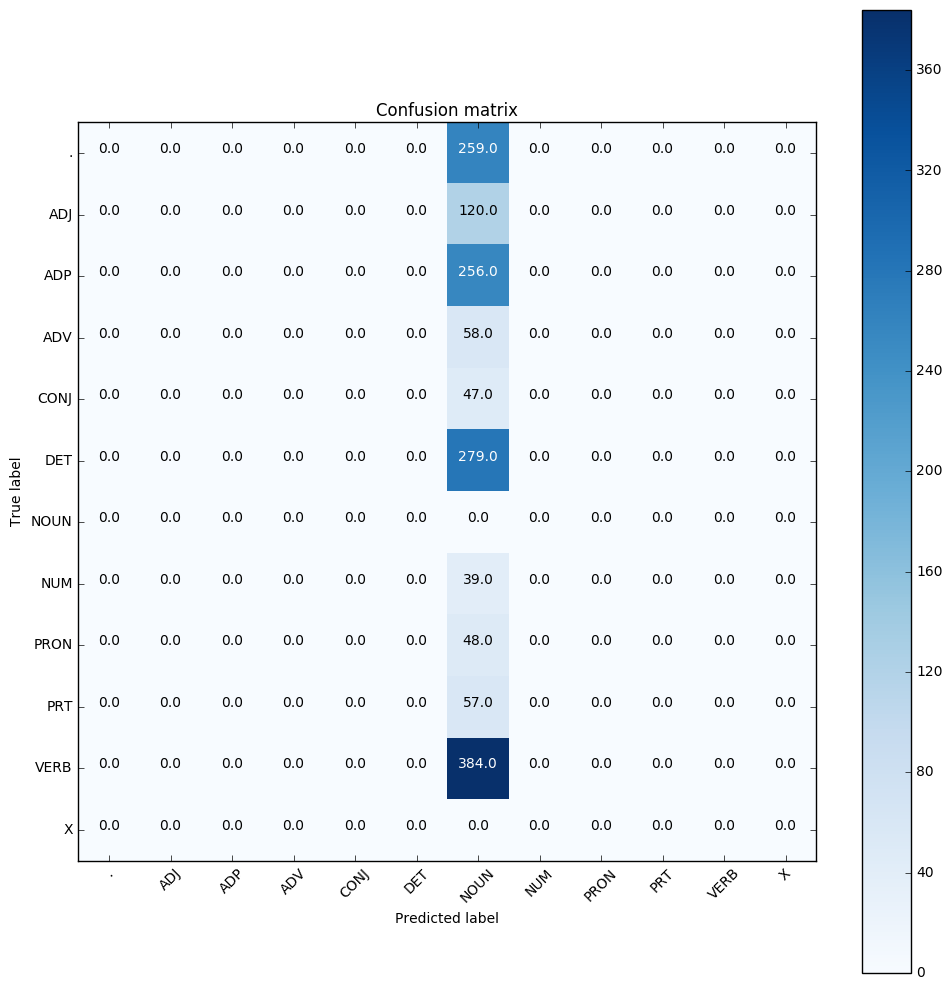

In [36]:
tagger = nltk.DefaultTagger('NOUN')
# Plot confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(ConfusionMatrix(tagger, test), classes=tags, title='Confusion matrix')
plt.show()

All columns are zero except for the 'Noun' column because the default tagger tags all words with 'Noun'.
All excpectations for tags are incorrect except for (Noun, Noun) and (X,Noun).
The rest of the matrix entries are 0 because we never expect anything other than Noun when using the default tagger.

4.2.3. Report the confusion matrix for the universal tagset of the Brown corpus for the best tagger discussed in class.Discuss the results: which pairs of tags are the most difficult to distinguish? Show examples of the 4 most frequent confusion pairs and explain why they are difficult to distinguish. 

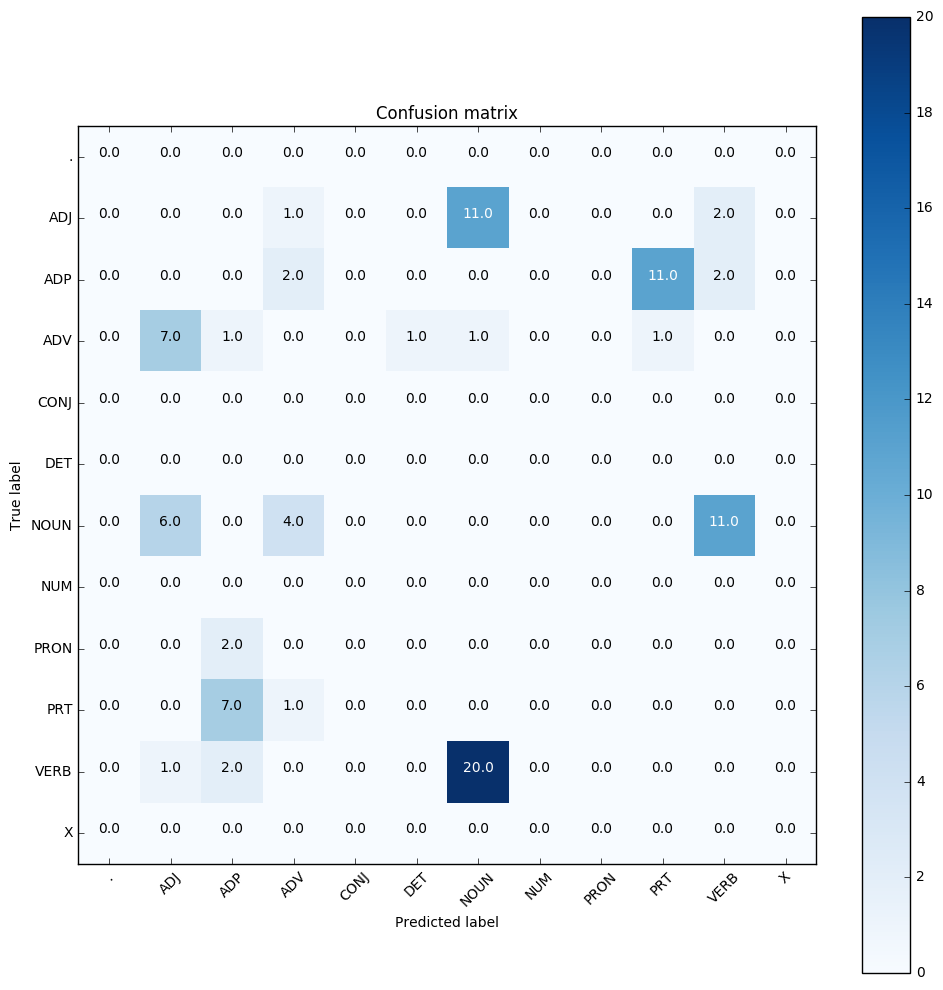

In [37]:
# Plot confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(ConfusionMatrix(ct3, test), classes=tags, title='Confusion matrix')
plt.show()

The 4 most frequent confusion pairs are (VERB,NOUN) (NOUN,VERB) (ADP,PRT) (PRT,ADP).
Verb/Noun: words ending in 'ing' can be either verbs or nouns
Prt/Adp: for example, "to" can be considered PRT or ADP depending on the contex. 

## 5 Averaged Perceptron

5.1. Explain in your own words how the Averaged perceptron algorithm works

The Averaged Perceptron predicts the tag of a word based on the information it has for the rest of the words.
It does this using the function predict which predicts the best tag by calculating the Dot-product of the given featres. 
During training we predict a tag if this tag is correct we increase it's weights if not we dicreased the weights.


5.2. Train the averaged perceptron tagger on the Brown dataset (full stratified training dataset with 90% of the sentences). 

In [38]:
from nltk.tag.perceptron import PerceptronTagger


In [39]:
PerceptronAv = nltk.PerceptronTagger(stratified_split_train)


5.3. Report on accuracy, and per tag Precision, Recall, F and confusion matrix. 


The PerceptronTagger uses a different set of tags (Penn TreeBank) and all our previous work uses the Universal tagset,
so we want to map the Penn TreeBank tagset to the Universal tagset. This mapping will help us re-use previous code without change.

In [40]:
from nltk.tag import mapping
tag_dict = mapping.tagset_mapping('en-ptb', 'universal')

In [41]:
def PerceptronmicroEvaluate(self, corpus_test):
    # True positive count (TP): number of words tagged as T both in the test set and by the tagger.
    # True negative count (TN): words tagged as non-T both in the test set and by the tagger.
    # False positive count (FP): words tagged as non-T in the test set and as T by the tagger.
    # False negative (FN): words tagged as T in the test set and as non-T by the tagger. 

    # flatten test list
    testList = [item for sublist in corpus_test for item in sublist]
    # get words without tags
    testWords = [word for word,tag in testList]
    # get tagger's prediction
    taggedWords = self.tag(testWords)
    taggedWords = [(w,tag_dict[t]) for w,t in taggedWords]
    results = []

    for t in tags:
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for (w1,tag1),(w2,tag2) in zip(taggedWords, testList):
            if (w1 == w1):
                if (tag1 == t) & (tag2 == t):
                    TP += 1
                if (tag1 == t) & (tag2 != t):
                    FP += 1
                if (tag1 != t) & (tag2 == t):
                    FN += 1
                if (tag1 != t) & (tag2 != t):
                    TN += 1
        if (TP + FP != 0):
            precision = TP / (TP + FP)
        else:
            precision = 0
        if (TP + FN != 0):
            recall = TP / (TP + FN)
        else:
            recall = 0
        if (2*TP + FP + FN != 0):
            fMeasure = 2*TP / (2*TP + FP + FN)
        else:
            fMeasure = 0
        measurments = [precision, recall, fMeasure]
        results.append(measurments)
    return results

# add microEvaluate to TaggerI interface
nltk.TaggerI.microEvaluate = PerceptronmicroEvaluate

PerceptronmicroEvaluate is the same as the previous microEvaluate expect it uses the mapping explained above.

In [42]:
PercTagger = nltk.PerceptronTagger(stratified_split_train)
for tag,measurments in zip(tags, PercTagger.microEvaluate(stratified_split_test)):
    print(tag, "-", measurments)

. - [0.9973956637801941, 0.9992824527071102, 0.9983381667698524]
ADJ - [0.8109882893728795, 0.8604273107292151, 0.8349766184010367]
ADP - [0.9619292972663518, 0.9021476510067115, 0.9310798642377225]
ADV - [0.9271657163877138, 0.862151530699504, 0.8934774902516838]
CONJ - [0.9858032378580324, 0.9944723618090452, 0.9901188242651657]
DET - [0.9409838621657441, 0.8628207877618128, 0.900208830548926]
NOUN - [0.913706785738448, 0.9516612056512701, 0.932297868668565]
NUM - [0.9259012016021362, 0.908316961362148, 0.9170247933884298]
PRON - [0.7184059544115367, 0.9586178357128078, 0.8213082786739939]
PRT - [0.605213567839196, 0.6224160206718347, 0.6136942675159236]
VERB - [0.964524765729585, 0.9238660041673346, 0.9437576749897667]
X - [0.07407407407407407, 0.02531645569620253, 0.03773584905660377]


Now to print the confusion matrix of the PerceptronTagger:
We'll write a new version of confusionMatrix function using the tag map.

In [43]:
def PerceptronConfusionMatrix(tagger, corpus_test):
    # flatten test list
    testList = [item for sublist in corpus_test for item in sublist]
    # get words without tags
    testWords = [word for word,tag in testList]
    # get tagger's prediction
    taggedWords = tagger.tag(testWords)
    taggedWords = [(w,tag_dict[t]) for w,t in taggedWords]
    # init matrix
    matrix = numpy.zeros(shape=((len(tags), len(tags))))

    for (w1,tag1),(w2,tag2) in zip(testList, taggedWords):
        if (tag1 != tag2):
            matrix[tags.index(tag1)][tags.index(tag2)] += 1

    return matrix

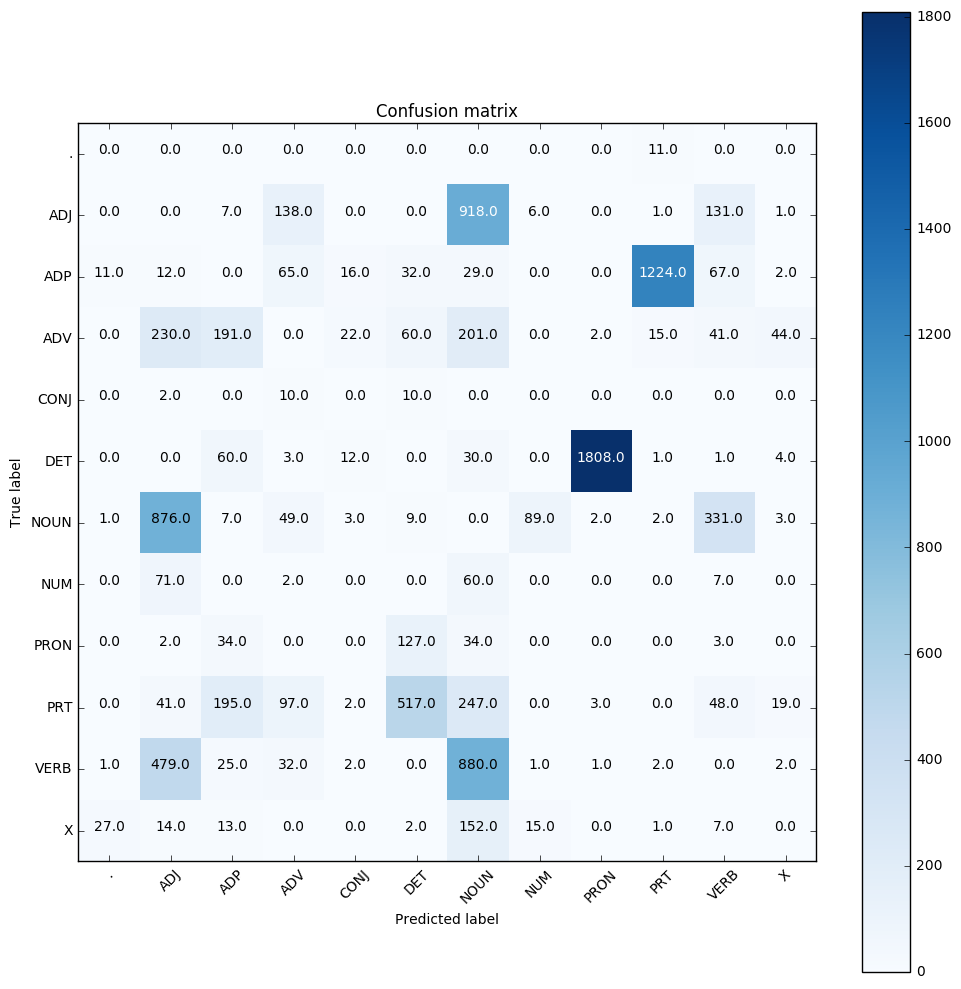

In [44]:
# Plot confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(PerceptronConfusionMatrix(PercTagger, stratified_split_test), classes=tags, title='Confusion matrix')
plt.show()

5.4. Study the source code of the NLTK PerceptronTagger: 

5.4.1. Explain the usage of the tagdict data structure - how many elements does it include? what fraction of the tested tokens are guessed through tagdict? 

The tagdict data structure is a collection of (word, tag) pairs where the ambiguity threshhold (the assurance of the tag to the word) is at least 0.97 , and the freq threshold (frequency of the word) at least 20. Which means the word is not unambigouos and not rare.

5.4.2. Are there errors at test time which are caused by the usage of tagdict? Write code to confirm your answer. 

Yes there is error -- > let's write code to see.

The function list_of_error() help us to detect errors at test time which are caused by the usage of the tagdict
So we compared the test list and the tagdict and returned list of all error.

In [45]:
def list_of_error():
# flatten test list
    flattenedTest = [item for sublist in stratified_split_test for item in sublist]
    error_lst = []
    for (w1,t1) in flattenedTest:
        try:
            t2 = PercTagger.tagdict[w1]
            t3 = tag_dict[t2]
            if t1 != t3:
                 error_lst.append([[w1, t1, t2, t3]])
        except:
            continue
    return error_lst
lst_errors = list_of_error()
print("Number of error: %d" % len(lst_errors))

Number of error: 3263


In [46]:
## here we can see the list of error 
print(lst_errors)


[[['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['to', 'ADP', 'TO', 'PRT']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['to', 'ADP', 'TO', 'PRT']], [['on', 'PRT', 'IN', 'ADP']], [['to', 'ADP', 'TO', 'PRT']], [['to', 'ADP', 'TO', 'PRT']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['to', 'ADP', 'TO', 'PRT']], [['since', 'ADV', 'IN', 'ADP']], [['his', 'DET', 'PRP$', 'PRON']], [['to', 'ADP', 'TO', 'PRT']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['to', 'ADP', 'TO', 'PRT']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'PRP$', 'PRON']], [['school', 'VERB', 'NN', 'NOUN']], [['his', 'DET', 'PRP$', 'PRON']], [['to', 'ADP', 'TO', 'PRT']], [['to', 'ADP', 'TO', 'PRT']], [['his', 'DET', 'PRP$', 'PRON']], [['his', 'DET', 'P

5.4.3. Write a version of the train / tag methods of the PercepronTagger that does not use tagdict - train this version and report on performance as in 5.3. Explain the differences you observe with the original version of PerceptronTagger. 

In [47]:
def new_tag(self, tokens):
	prev, prev2 = self.START
	output = []

	context = self.START + [self.normalize(w) for w in tokens] + self.END
	for i, word in enumerate(tokens):
		# tag = self.tagdict.get(word)
		# if not tag:
		features = self._get_features(i, word, context, prev, prev2)
		tag = self.model.predict(features)
		output.append((word, tag))
		prev2 = prev
		prev = tag

	return output


In [48]:
def new_train(self, sentences, save_loc=None, nr_iter=5):
	# self._make_tagdict(sentences)
	self.model.classes = self.classes
	for iter_ in range(nr_iter):
		c = 0
		n = 0
		for sentence  in sentences:
			words = [word for word,tag in sentence]
			tags  = [tag for word,tag in sentence]

			prev, prev2 = self.START
			context = self.START + [self.normalize(w) for w in words] + self.END
			for i, word in enumerate(words):
				feats = self._get_features(i, word, context, prev, prev2)
				guess = self.model.predict(feats)
				self.model.update(tags[i], guess, feats)
				prev2 = prev
				prev = guess
				c += guess == tags[i]
				n += 1
		random.shuffle(sentences)
		logging.info("Iter {0}: {1}/{2}={3}".format(iter_, c, n, _pc(c, n)))
	self.model.average_weights()
	# Pickle as a binary file
	if save_loc is not None:
		with open(save_loc, 'wb') as fout:
			pickle.dump((self.model.weights, self.tagdict, self.classes), fout, -1)

In [49]:
nltk.PerceptronTagger.tag = new_tag
nltk.PerceptronTagger.train = new_train

In [50]:
##new
new_PerecptronTagg = nltk.PerceptronTagger(stratified_split_train)
for tag,measurments in zip(tags, new_PerecptronTagg.microEvaluate(stratified_split_test)):
    print(tag, "-", measurments)

. - [0.6515151515151515, 0.0028049575994781475, 0.005585866458820473]
ADJ - [0.3449462130726806, 0.7335113794705063, 0.4692293407613742]
ADP - [0.7954951734000715, 0.44798657718120805, 0.5731827744622386]
ADV - [0.6327529923830251, 0.5967162647511545, 0.6142064959070505]
CONJ - [0.60932944606414, 0.05251256281407035, 0.09669211195928754]
DET - [0.6119205298013245, 0.09907784687969119, 0.17054263565891473]
NOUN - [0.47740188480929224, 0.944156713525702, 0.6341521132093332]
NUM - [0.7731152204836416, 0.7118533071381794, 0.7412205932492328]
PRON - [0.37755102040816324, 0.0765570039313056, 0.1273008773438844]
PRT - [0.3215258855585831, 0.11434108527131782, 0.16869192280200143]
VERB - [0.5887383026782833, 0.7798258267884811, 0.6709416442575099]
X - [0.061224489795918366, 0.0379746835443038, 0.046875]


Now let's see the confusion matrix of the new Perceptrion tagger without the use of tagdict:

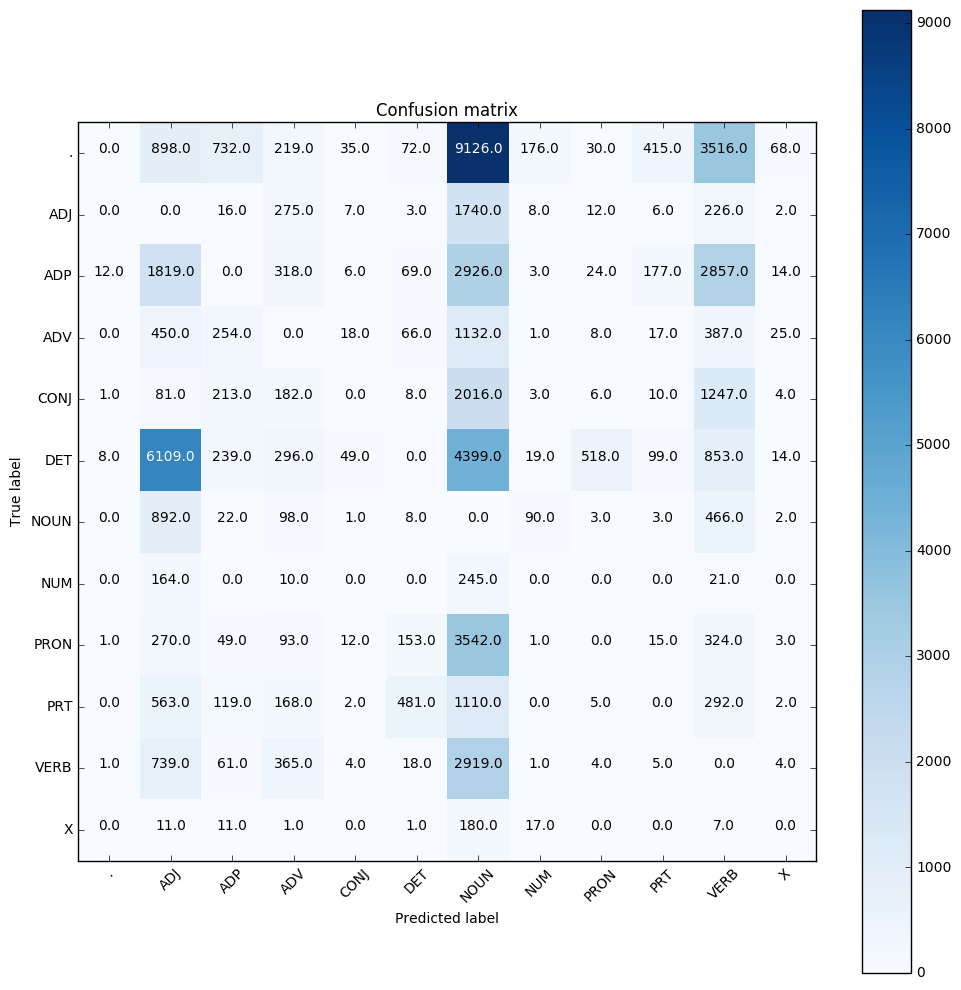

In [51]:
# Plot confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(PerceptronConfusionMatrix(new_PerecptronTagg, stratified_split_test), classes=tags, title='Confusion matrix')
plt.show()

Explain the differences you observe with the original version of PerceptronTagger:

We can see that without the tagdict the performance of the tagger has greatly dicreased.


5.4.4. Write a function get_features(perceptronTagger, taggedSentence) which shows the computed features for a single sentence. pay attention to the way words guessed through tagdict are encoded as features. 

In [52]:
def get_features(perceptronTagger, taggedSentence):
	# print(taggedSentence)
	context = [word for word,tag in taggedSentence]
	for i in range(0,len(taggedSentence)):
		word,tag = taggedSentence[i]
		if(i-1 >= 0):
			word1,prev = taggedSentence[i-1]
		else:
			prev = ""
		if(i-2 >= 0):
			word2,prev2 = taggedSentence[i-2]
		else:
			prev2 = ""
		print("\ni: ",i,"| word: ",word,"| prev: ",prev,"| prev2: ",prev2,"\n")
		print((perceptronTagger._get_features(-2, word, context, prev, prev2)).items())

In [54]:
sentence = ["this", "string", "is", "a", "very", "long", "and","boring", "sentence"]
taggedSentence = tagger.tag(sentence)
taggedSentence = [(w,tag_dict[t]) for w,t in taggedSentence]
get_features(PercTagger, taggedSentence)


i:  0 | word:  this | prev:   | prev2:   

dict_items([('i-1 word sentence', 1), ('i-1 suffix nce', 1), ('i word this', 1), ('i-2 tag ', 1), ('i+1 suffix ing', 1), ('i+1 word string', 1), ('i-1 tag ', 1), ('i-1 tag+i word  this', 1), ('bias', 1), ('i+2 word is', 1), ('i pref1 t', 1), ('i tag+i-2 tag  ', 1), ('i-2 word boring', 1), ('i suffix his', 1)])

i:  1 | word:  string | prev:  X | prev2:   

dict_items([('i-1 tag X', 1), ('i-1 word sentence', 1), ('i-1 suffix nce', 1), ('i word this', 1), ('i tag+i-2 tag X ', 1), ('i+2 word is', 1), ('i+1 word string', 1), ('bias', 1), ('i suffix ing', 1), ('i pref1 s', 1), ('i-1 tag+i word X this', 1), ('i+1 suffix ing', 1), ('i-2 word boring', 1), ('i-2 tag ', 1)])

i:  2 | word:  is | prev:  X | prev2:  X 

dict_items([('i-1 tag X', 1), ('i-1 word sentence', 1), ('i suffix is', 1), ('i-1 suffix nce', 1), ('i word this', 1), ('i+2 word is', 1), ('i+1 word string', 1), ('i tag+i-2 tag X X', 1), ('bias', 1), ('i-1 tag+i word X this', 1), ('i+1 

 Explain the meaning of each of 13 computed features that are computed for each token - indicate for each whether they correspond to morphological, syntactic or lexical knowledge:
 
morphology: analyses the structure of words and parts of words like prefix and suffix

tags = syntax

lexical = relationship between meaning of words

add('i suffix', word[-3:])				#morphological	# suffix of current word (3 letters)

add('i pref1', word[0])					#morphological	# prefix (first letter) of curent word

add('i-1 tag', prev)						#syntactic		# previuos word's tag

add('i-2 tag', prev2)						#syntactic		# tag of word two words prior

add('i tag+i-2 tag', prev, prev2)			#syntactic		# both previous tags

add('i word', context[i])					#lexical		# current word

add('i-1 tag+i word', prev, context[i])	#lexical & syntactic		# previous word and it's tag

add('i-1 word', context[i-1])				#lexical		# previous word

add('i-1 suffix', context[i-1][-3:])		#morphological	# previous word's suffix (3 letters)

add('i-2 word', context[i-2])				#lexical		# 2nd previous word

add('i+1 word', context[i+1])				#lexical		# next word

add('i+1 suffix', context[i+1][-3:])		#morphological	# next word's suffix (3 letters)

add('i+2 word', context[i+2])				#lexical		# next next word



5.4.5. Explain the role of the function normalize():


1) All words are lower cased : ==> Prevents case senstive tagging

2)!HYPHEN ==> Prevents spliting the the hypthnting words into three tokens .

3)Digits And Years: ==> This help the tagger to attribute the digits and years as one structure.

5.4.6. Inspect the value of the variable perceptronTagger.model.weigths after it has been trained. How many elements does it include? Pick some of the elements of this data structure and explain their intuitive meaning as a rule "if .... then ...". 

In [55]:
print(len(PercTagger.model.weights))

75447


Let's see the model weights:

To  Pick some of the elements of this data structure and explain their intuitive meaning as a rule "if .... then ...".

In [56]:
PercTagger.model.weights

{'i word commodity': {'NN': -1.698, 'NNP': 1.698},
 'i-1 tag+i word TO reinforce': {'NN': -1.013, 'VB': 1.013},
 'i-1 tag+i word RB lease': {'VB': 1.586, 'VBD': -0.725, 'VBP': -0.861},
 'i-1 tag+i word VBD related': {'JJ': 1.367, 'VBN': -1.367},
 'i-2 word page': {'FW': -0.933,
  'RB': 0.933,
  'VBD': -0.649,
  'VBN': 0.943,
  'VBP': -0.294},
 'i-1 tag+i word CD libyans': {'NNP': -0.847, 'NNPS': 1.497, 'NNS': -0.65},
 'i-1 tag+i word -START- companies': {'NNP': -0.936,
  'NNPS': -0.699,
  'NNS': 1.635},
 'i-2 word phased': {'IN': 1.677, 'RB': -1.677},
 'i suffix FEE': {'NN': 0.757, 'NNP': -0.067, 'NNS': -0.69},
 'i+1 suffix esh': {'JJR': -1.925, 'RBR': 1.925, 'VBD': -1.555, 'VBN': 1.555},
 'i-1 tag+i word , embarrassed': {'JJ': -0.177, 'VBN': 0.177},
 'i-1 tag+i word NN even': {'JJ': -0.522,
  'NN': -0.949,
  'NNS': -0.893,
  'RB': 3.28,
  'VBN': -0.916},
 'i+2 word every': {'IN': -0.945,
  'JJ': 0.043,
  'JJR': 1.858,
  'NN': 0.493,
  'NNP': -1.444,
  'NNS': 1.3,
  'RB': 1.895,
  'VB'

Now after we have seen the weight of the tagger -- > We will pick some of the elements of this data structure and
explain the their intuitive meaning as a rule "if .... then ..."   :

We will pick 3 randomly elements :

1) 'i-1 suffix gle': {'CD': -0.928,
  'IN': -0.192,
  'JJ': -0.316,
  'JJS': -0.482,
  'NN': 1.244,
  'NNP': 1.146,
  'NNPS': -1.146,
  'RB': -0.914,
  'RBS': 0.482,
  'RP': 1.106}
  
If the previus word ends with gle and it's 'NN' Then add to the weight  1.244 this is because  PercTagger.model.weights['i-1 suffix gle']['NN'] =  1.244

2) 'i word slay': {'NNP': -0.865, 'VBP': 0.865},

If the word  is slay and it's 'NNP' Then add to the weight -0.865 this is because
PercTagger.model.weights[ 'i word slay']['NNP'] = -0.865

3) 'i+1 word budget': {'CD': 0.597,
  'FW': -0.812,
  'IN': -1.024,
  'JJ': 1.562,
  'NN': 0.338,
  'NNP': 0.628,
  'RP': 1.024,
  'VB': 0.354,
  'VBG': -0.702,
  'VBN': -2.058,
  'VBP': 0.093}
  
If the next word  is budget and it's 'CD' Then add to the weight 0.597 this is because
PercTagger.model.weights[ 'i+1 word budget']['CD'] = 0.597
 
 
